<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_3/3_6_PCA_tSNE_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [2]:
digits = load_digits()

X = digits.data
y = digits.target
print(digits.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

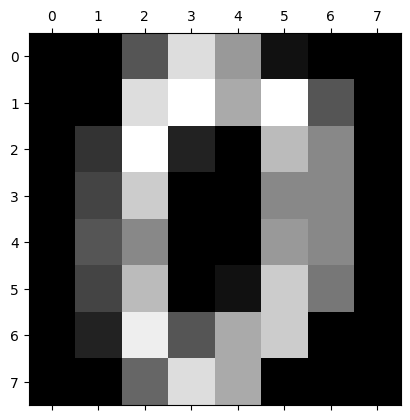

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

PCA

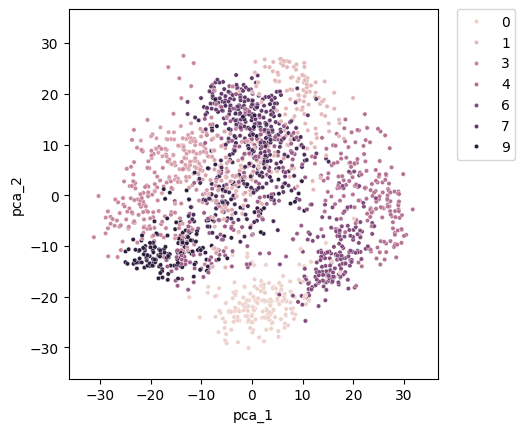

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

tSNE

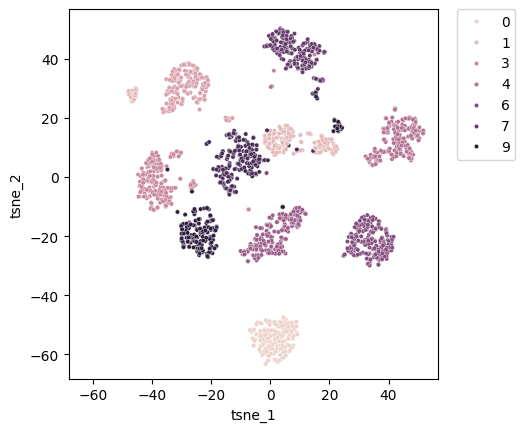

In [5]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [6]:
for k, v in tsne.get_params().items():
    print(k, "=", v)

#init="pca" - початкове розташування точок береться з перших двох головних компонент PCA.

angle = 0.5
early_exaggeration = 12.0
init = pca
learning_rate = auto
max_iter = None
method = barnes_hut
metric = euclidean
metric_params = None
min_grad_norm = 1e-07
n_components = 2
n_iter = deprecated
n_iter_without_progress = 300
n_jobs = None
perplexity = 30.0
random_state = None
verbose = 0


t-SNE параметр perplexity — приблизно відповідає “кількості сусідів, що враховуються при збереженні локальної структури”.
erplexity визначає “масштаб локальності”:

Мале значення (5–10): алгоритм зосереджується на дуже локальних структурах → дрібні кластери, але глобальна структура може “ламатися”.

Середнє значення (20–50): баланс між локальною і глобальною структурою (найчастіше використовують ~30).

Велике значення (100+): t-SNE намагається врахувати далекі відстані, кластери можуть “зливатися”.